In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

def standardise(vec): return (vec - vec.mean()) / vec.std()

In [185]:
df = pd.read_parquet("../../data/small/A1.parquet")
df["date"] = pd.to_datetime(df.loc[:, ["year", "month", "day", "hour"]])
df.drop(columns=["year", "month", "day", "hour"], inplace=True)
df.set_index("date", inplace=True)
df

topn = 25
df_topn = df[["sumCount", "domain"]].groupby("domain").sum("sumCount").sort_values("sumCount", ascending=False)[0:topn]
df_treshold = df.domain.isin(df_topn.index).to_frame().rename(columns={"domain": "sumCount"})
df.loc[df_treshold["sumCount"], "newDomain"] = df[df_treshold["sumCount"]].domain
df.loc[~df_treshold["sumCount"], "newDomain"] = "combined.domain"

df.drop(columns=["domain"], inplace=True)

df = df.groupby([df.index, "trafficType", "newDomain"]).sum("sumCount")
df.reset_index(inplace=True)
df.sort_values(["date", "sumCount"], ascending=[True, False], inplace=True)
df = df.set_index("date")
df

,trafficType,newDomain,sumCount
date,,,
2018-09-01 00:00:00,user,en.wikipedia,270212
2018-09-01 00:00:00,spider,en.wikipedia,222363
2018-09-01 00:00:00,spider,commons.wikimedia,219606
2018-09-01 00:00:00,spider,combined.domain,176423
2018-09-01 00:00:00,user,commons.wikimedia,54273
...,...,...,...
2019-09-30 23:00:00,user,hu.wikipedia,401
2019-09-30 23:00:00,spider,te.wikipedia,292
2019-09-30 23:00:00,spider,gu.wikipedia,154


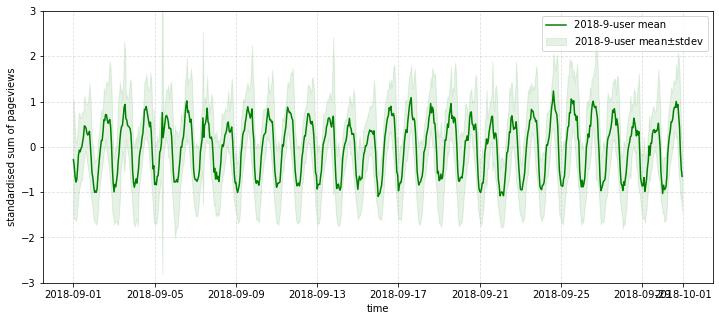

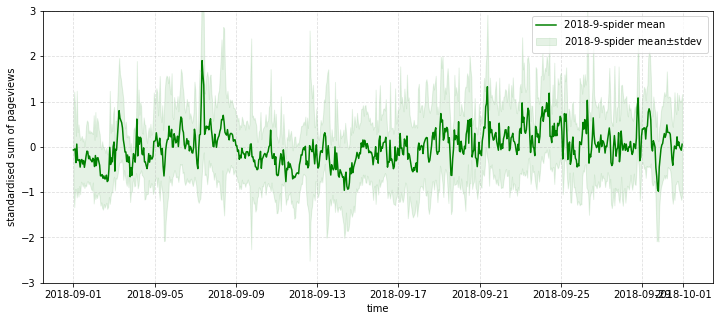

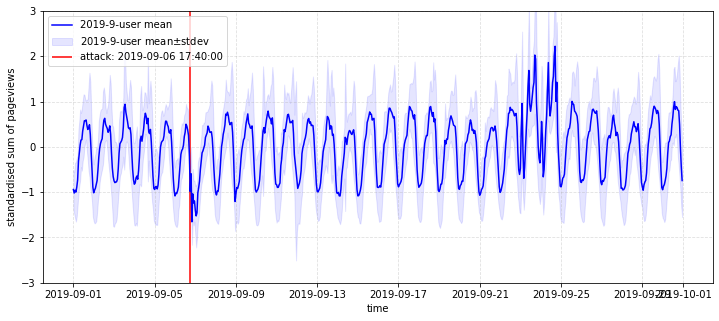

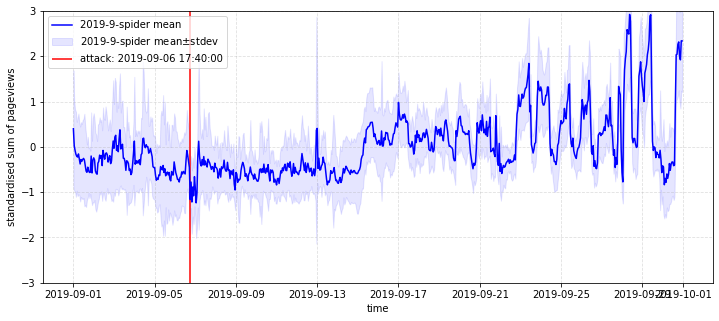

In [187]:
years = df.index.year.unique().to_list()
months = df.index.month.unique().to_list()
domains = df["newDomain"].unique()
traffictypes = df["trafficType"].unique()

attack_start = datetime.datetime(2019,9,6,17,40,0)

for year in years:
    color = "green" if year == 2018 else "blue"
    for month in months:
        for traffictype in traffictypes:
            plt.figure(figsize=(12,5))
            x = pd.date_range(start=datetime.datetime(year,month,1,0), end=datetime.datetime(year,month,30,23), freq="H")
            ys = np.zeros(shape=(len(domains), len(x)))
            for i, domain in enumerate(domains):
                dfcut = df[
                    (df.index.year == year) &
                    (df.index.month == month) &
                    (df.trafficType == traffictype) &
                    (df.newDomain == domain)
                ]
                y = dfcut.reindex(index=x)["sumCount"].fillna(0)
                ys[i] = y.transform(standardise).to_numpy().reshape(-1)
            plt.plot(x, np.mean(ys, axis=0), label=f"{year}-{month}-{traffictype} mean", color=color, alpha=1)
            plt.fill_between(x, np.mean(ys, axis=0)-np.std(ys, axis=0), np.mean(ys, axis=0)+np.std(ys, axis=0), label=f"{year}-{month}-{traffictype} mean$\pm$stdev", color=color, alpha=0.1)
            # plt.xlim(datetime.date(2019, 9, 1), datetime.date(2019, 9, 15))
            plt.ylim(-3,3)
            if (year == 2019): plt.vlines(attack_start, *plt.gca().get_ylim(), color="red", label=f"attack: {attack_start}")
            # plt.legend(loc=9, bbox_to_anchor=(1.2, 1))
            plt.legend()
            plt.grid(which="both", alpha=0.4, linestyle="--")
            plt.xlabel("time")
            plt.ylabel("standardised sum of pageviews")
            plt.show()

,sumCount
date,
2019-09-01 00:00:00,34
2019-09-01 01:00:00,67
2019-09-01 02:00:00,83
2019-09-01 03:00:00,126
2019-09-01 04:00:00,194
...,...
2019-09-30 19:00:00,58
2019-09-30 20:00:00,27
2019-09-30 21:00:00,23


ValueError: x and y must have same first dimension, but have shapes (6337,) and (24,)

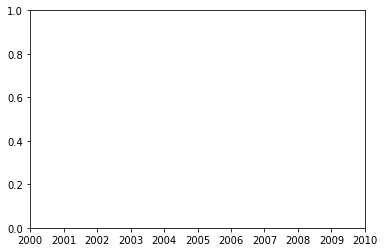

In [61]:
years = df.index.year.unique().to_list()
months = df.index.month.unique().to_list()
days = df.index.day.unique().to_list()
domains = df["newDomain"].unique()
traffictypes = df["trafficType"].unique()

x = pd.date_range(start='1/9/2018', end='30/9/2018', freq='H')

for year in years:
    for month in months:
        for day in days:
            for traffictype in traffictypes:
                for i, domain in enumerate(domains):
                    # print(year, month)
                    dfcut = df[
                        (df.index.year == year) &
                        (df.index.month == month) &
                        (df.index.day == day) &
                        (df.trafficType == traffictype) &
                        (df.newDomain == domain)
                    ]
                    plt.plot(x, dfcut.sumCount)
                    break

In [56]:
dfcut

,trafficType,newDomain,sumCount
date,,,
2019-09-30 00:00:00,spider,en.wikipedia,183271
2019-09-30 01:00:00,spider,en.wikipedia,171956
2019-09-30 02:00:00,spider,en.wikipedia,168056
2019-09-30 03:00:00,spider,en.wikipedia,151023
2019-09-30 04:00:00,spider,en.wikipedia,168011
2019-09-30 05:00:00,spider,en.wikipedia,185170
2019-09-30 06:00:00,spider,en.wikipedia,189668
2019-09-30 07:00:00,spider,en.wikipedia,183266
2019-09-30 08:00:00,spider,en.wikipedia,163420


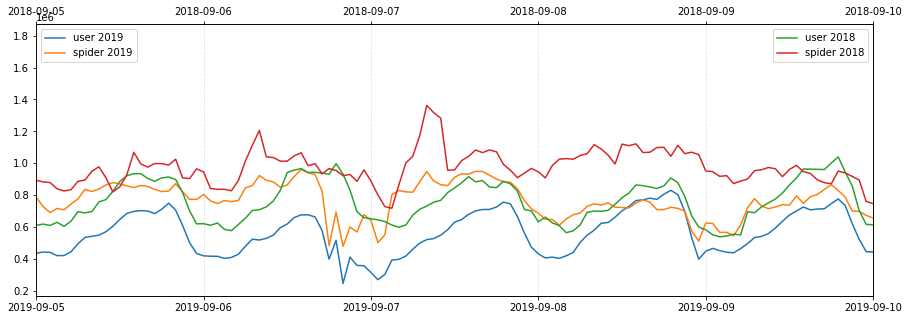

In [9]:
# fig, ax1 = plt.subplots(figsize=(15,5))
# ax1.plot(df_user[df_user.index.year == 2019], label="user 2019", color="C0")
# ax1.plot(df_spider[df_spider.index.year == 2019], label="spider 2019", color="C1")
# ax2 = ax1.twiny()
# ax2.plot(df_user[df_user.index.year == 2018], label="user 2018", color="C2")
# ax2.plot(df_spider[df_spider.index.year == 2018], label="spider 2018", color="C3")

# ax1.set_xlim(datetime.date(2019, 9, 5), datetime.date(2019, 9, 10))
# ax2.set_xlim(datetime.date(2018, 9, 5), datetime.date(2018, 9, 10))
# plt.grid(linestyle="--", alpha=0.4)
# ax1.legend(loc=2)
# ax2.legend()
# plt.show()

# IDEA

if server unavailable, then users might refresh a lot, search anew a lot --> those topics that are included are maybe there multiple times, since multiple requests are sent